# DEALING WITH IMBALANCED TARGET DATASET : "Failure Type"

In this Jupiter Notebook, we will deal with the imbalanced dataset for the second target : "Failure Type". 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [3]:
data = pd.read_csv('preprocessed_predictive_maintenance.csv', sep=',')
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,0,298.1,308.6,1551,42.8,0,0,1
1,2,L47181,-1,298.2,308.7,1408,46.3,3,0,1
2,3,L47182,-1,298.1,308.5,1498,49.4,5,0,1
3,4,L47183,-1,298.2,308.6,1433,39.5,7,0,1
4,5,L47184,-1,298.2,308.7,1408,40.0,9,0,1


In [16]:
#distribution of Failure Type
failure_count = data['Failure Type'].value_counts()
total_ratio = failure_count.max() / (failure_count[0]+failure_count[2]+failure_count[3]+failure_count[4])
print(f"Global ratio for 'Failure Type' = 1 VS others class : 1:{total_ratio:.4f}")

print("Class distribution for original dataset:\n", failure_count)

Global ratio for 'Failure Type' = 1 VS others class : 1:29.2212
Class distribution for original dataset:
 Failure Type
1    9643
0     112
3      95
2      78
4      45
Name: count, dtype: int64


Imbalance ratio ≈ 1:214.29


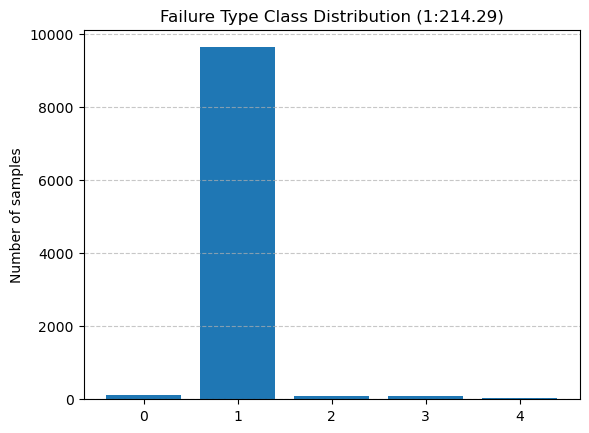

In [17]:
minority = failure_count.min()
majority = failure_count.max()
ratio = majority/minority
print(f"Imbalance ratio ≈ 1:{ratio:.2f}")

plt.bar([1,0,3,2,4],failure_count)
plt.title(f"Failure Type Class Distribution (1:{ratio:.2f})")
plt.ylabel("Number of samples")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [9]:
repartition_failure = (data["Failure Type"] == 1).mean()
print(f"Repartition of 'Failure Type' = 1 : {ratio_failure:.4f} ({repartition_failure*100:.2f}%)")

Ratio of 'Failure Type' = 1 : 1:0.9669 (96.69%)


When we compute the global ratio between "No Failure" and other class (which amounts to finding the ratio between Target=1 and Target=0), we obtain a moderate ratio as saw in the other Jupiter Notebook (1:29.2212), but here we will consider ratio between class 2 by 2. 


We notice that the repartition is imbalanced with a ratio of 1:214.29, which is moderate but tends to be severe. So, between the most representated class (1: No Failure) and the less representated class (4: Tool Wear Failure), the gap is large.

But in fact, class 1 (No Failure) represents 96% of the values. The ratio (1:214.29 > 100) is severe. 

We will adjust the training dataset that has been already split, by creating a new dataset for X train and for y train by not changing "Target" column. 
We choose to use a hybrid sampling on Failure Type column consisting of a :
- Random Under Sampling to reduce the over-represented class (here : "No Failure"=1)
- SMOTE to balance the less represented class (the others)

In [18]:
y_train = pd.read_csv('y_train.csv', sep=',')
X_train = pd.read_csv('X_train.csv', sep=',')
print(y_train.head())
print(X_train.head())
y_train_resampled_failure_type = y_train["Failure Type"]
X_train_resampled_failure_type = X_train.copy()

   Target  Failure Type
0       0             1
1       0             1
2       0             1
3       0             1
4       0             1
   Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     0                298.5                    309.6                    1441   
1    -1                302.4                    310.2                    1503   
2    -1                300.0                    309.6                    1496   
3    -1                302.3                    310.9                    1403   
4     0                300.3                    309.5                    1320   

   Torque [Nm]  Tool wear [min]  
0         48.2              107  
1         36.2              166  
2         38.8               27  
3         47.2              173  
4         62.2              142  


Class distribution for resampled dataset:
 Failure Type
0    40
1    40
2    40
3    40
4    40
Name: count, dtype: int64


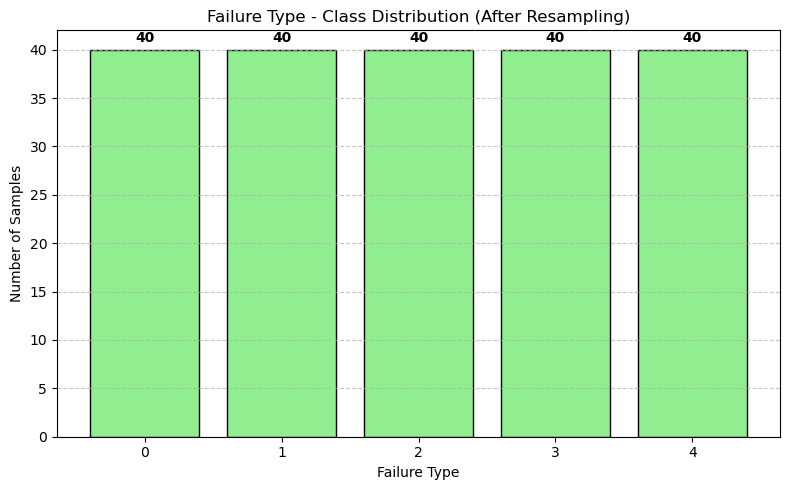

In [25]:
rus = RandomUnderSampler(sampling_strategy="auto", random_state=42)
X_rus, y_rus = rus.fit_resample(X_train_resampled_failure_type, y_train_resampled_failure_type)

smote = SMOTE(sampling_strategy="auto", random_state=42)
X_balanced, y_failure_balanced = smote.fit_resample(X_rus, y_rus)

y_train_balanced = y_train.loc[y_train.index.intersection(y_failure_balanced.index)].copy()
y_train_balanced["Failure Type"] = y_failure_balanced

resampled_count = pd.Series(y_failure_balanced).value_counts().sort_index()

print("Class distribution for resampled dataset:\n", resampled_count)

plt.figure(figsize=(8, 5))
plt.bar(resampled_count.index, resampled_count.values, color='lightgreen', edgecolor='black')
plt.title("Failure Type - Class Distribution (After Resampling)")
plt.xlabel("Failure Type")
plt.ylabel("Number of Samples")
plt.xticks(resampled_count.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(resampled_count.values):
    plt.text(resampled_count.index[i], v + 0.02 * max(resampled_count.values),
             str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [20]:
X_balanced

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0,302.2,310.6,1355,51.5,126
1,0,302.2,310.6,1346,49.2,134
2,-1,303.3,311.3,1350,48.1,32
3,-1,303.3,311.6,1337,56.8,187
4,-1,303.0,311.0,1359,44.2,115
...,...,...,...,...,...,...
195,-1,298.8,308.9,1455,41.3,208
196,-1,301.7,311.0,1441,44.3,208
197,1,297.9,307.4,1604,36.1,225
198,-1,303.3,311.4,1497,46.0,234


In [21]:
y_train_balanced

,Target,Failure Type
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
195,0,4
196,0,4
197,1,4
198,0,4


In [22]:
X_balanced.to_csv('X_train_resampled_failure_type.csv', index=False)
y_train_balanced.to_csv('y_train_resampled_failure_type.csv', index=False)